# imports

In [90]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing as pp
from sklearn import linear_model as lm
from plotly import graph_objects as go

# dataset

In [16]:
m = 100
x = np.linspace(-5, 5, num = 100) # variavel exploratoria
y = 0.3*x**2 + x + 2 + np.random.normal(size=m)


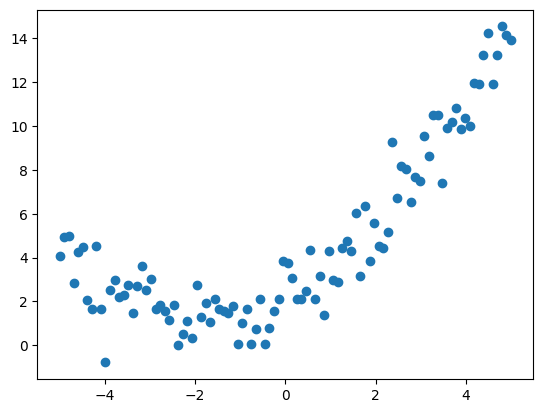

In [17]:
plt.scatter(x, y)

# treinamento do algoritmo

In [52]:
poly = pp.PolynomialFeatures(degree=2)

In [53]:
x_poly = poly.fit_transform(x.reshape(-1, 1))

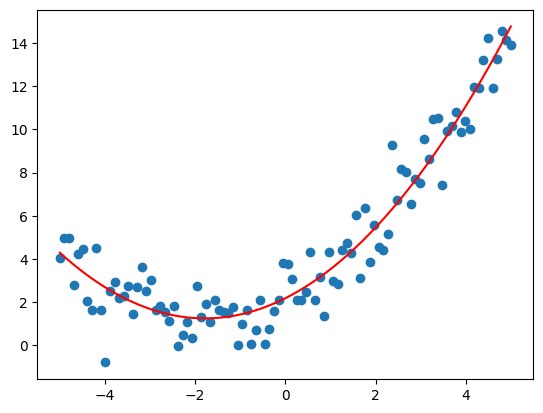

In [54]:
# training
model = lm.LinearRegression()
model.fit (x_poly, y)

# predict
yhat = model.predict(x_poly)

#visual

plt.scatter(x, y)
plt.plot(x, yhat, color='red')

# graus do polynomial

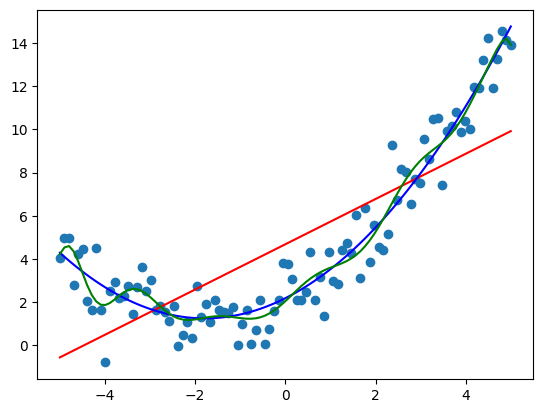

In [65]:
degrees = [1, 2, 15]
coef = []
intercepts = []
preds = []

for i in degrees:
    poly = pp.PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x.reshape(-1, 1))

    # model training
    model = lm.LinearRegression()
    model.fit(x_poly, y)

    # model predict
    yhat = model.predict(x_poly)
    preds.append(yhat)

# visualizacao
plt.scatter(x, y)
plt.plot(x, preds[0], color='red')
plt.plot(x, preds[1], color='blue')
plt.plot(x, preds[2], color='green')
    

# decision boundarie

In [80]:
np.random.seed(0)
n_samples = 100
x = np.random.rand(n_samples, 2) * 10
coef = np.array([4, -3, 2])
y_true = np.dot(np.column_stack([x[:, 0]**2, 
                                 x[:, 1], 
                                 np.ones(n_samples)],
)
 ,coef)


In [81]:
y_noise = np.random.normal(0, 2, n_samples)
y = y_true + y_noise

In [83]:
poly = pp.PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

model = lm.LinearRegression()
model.fit(x_poly, y)


LinearRegression()

In [88]:
x1_min, x1_max = x[:, 0].min() -1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() -1, x[:, 1].max() + 1

x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                               np.arange(x2_min, x2_max, 0.1))
x_mesh = np.column_stack([x1_mesh.ravel(), x2_mesh.ravel()])

x_mesh_poly = poly.transform(x_mesh)
y_mesh = model.predict(x_mesh_poly)
y_mesh = y_mesh.reshape(x1_mesh.shape)


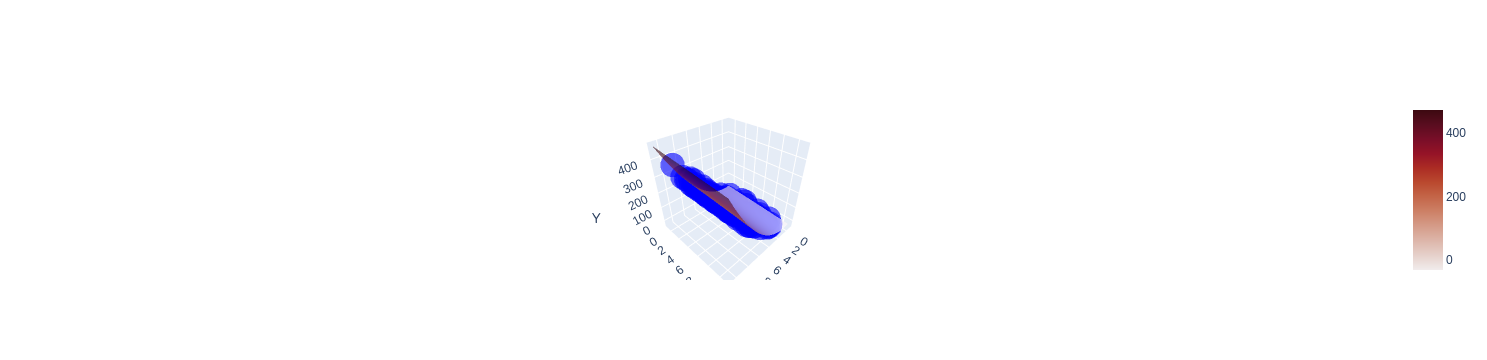

In [94]:
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x[:, 0],
            y=x[:, 1],
            z=y,
            mode='markers',
            marker=dict(color='blue', opacity=0.6),
            name='Dados'
        ),
        go.Surface(
            x=x1_mesh,
            y=x2_mesh,
            z=y_mesh,
            colorscale='amp',
            opacity=0.6,
            name='Superficie de decisao'
                  )
    ]
)

fig.update_layout(
    scene=dict(
        xaxis_title='x1',
        yaxis_title='x2',
        zaxis_title='Y',
        aspectmode='auto'
    ))

fig.show()
    